# Validating the conservative Kuramoto Sivashinsky equation

The below image is taken from [PDE-Refiner](https://arxiv.org/pdf/2308.05732) paper on
page 21 which is the time-averaged spectrum of the conservative KS equation on $L=64$
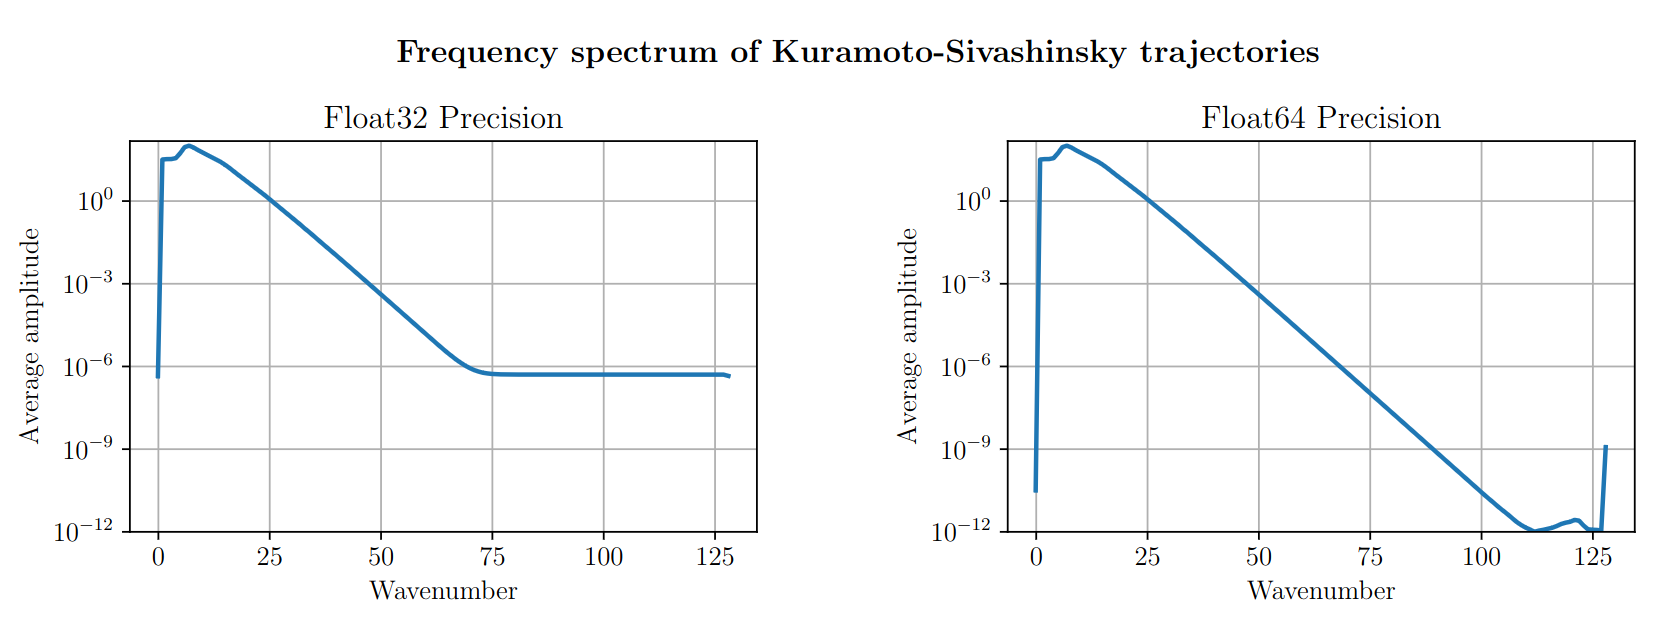

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import exponax as ex

In [3]:
ks_conservative_stepper = ex.stepper.KuramotoSivashinskyConservative(1, 64, 250, 0.1)

In [4]:
# Initial condition does not matter, it is only important that it has zero mean
u_0 = jax.random.normal(jax.random.PRNGKey(0), (1, ks_conservative_stepper.num_points))
u_0 = u_0 - jnp.mean(u_0)

In [5]:
trj = ex.rollout(ks_conservative_stepper, 5000, include_init=True)(u_0)

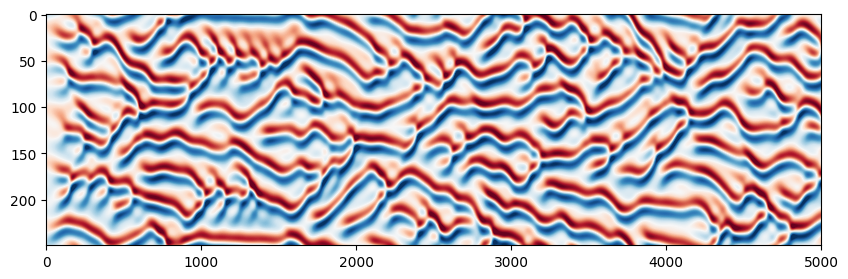

In [6]:
plt.figure(figsize=(10, 3))
plt.imshow(trj[:, 0, :].T, aspect="auto", cmap="RdBu_r", vmin=-2.5, vmax=2.5)

Let's choose the spectrum from time step 500 onwards

In [7]:
chaotic_trj = trj[500:]

Transform into Fourier space

In [8]:
chaotic_trj_hat = jnp.fft.rfft(chaotic_trj)

Average the mean over time

In [9]:
mean_amplitude = jnp.mean(jnp.abs(chaotic_trj_hat), axis=0)

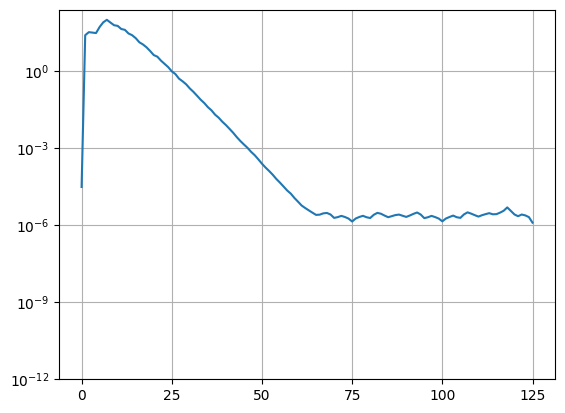

In [10]:
plt.semilogy(mean_amplitude[0])
plt.grid()
plt.xticks(
    [
        0,
        25,
        50,
        75,
        100,
        125,
    ]
)
plt.yticks([1e-12, 1e-9, 1e-6, 1e-3, 1e0]);